## Bike Sharing Assignment - Linear Regression

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Bussiness Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Read Data

In [2]:
#Read data from Csv
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#get shape of data
bike.shape

(730, 16)

In [4]:
#get info from data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [5]:
#get description of data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Visualization

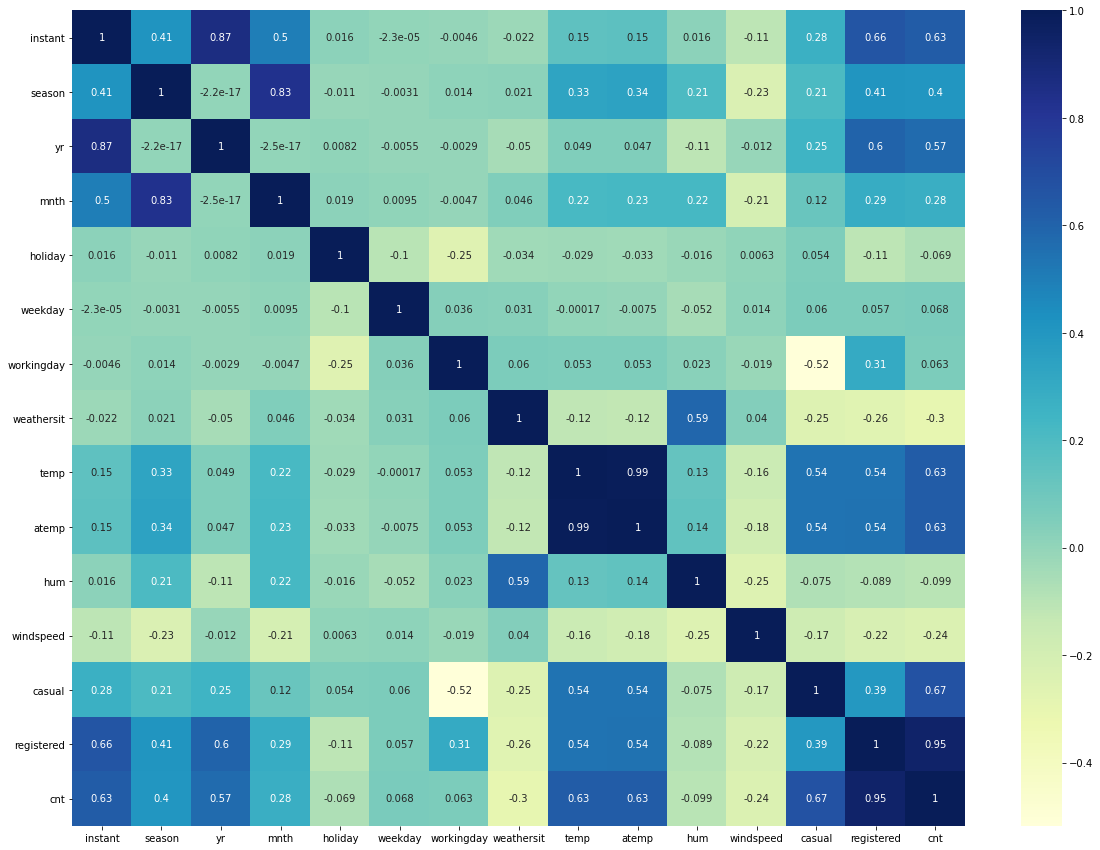

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(bike.corr(), annot =True, cmap="YlGnBu")
plt.show()

### Drop Extra Columns

* <b>instant-</b> just a counter.
* <b>dteday-</b> season is derived from dtedate. So, we can use season in place of dteday for better interpetaion.
* <b>casual-</b> count of users which come directly. so don't required as independent variable.
* <b>registered-</b> count of users which comes through registration. Not required as independent variable.

___`cnt` is sum of casual + registered which is our `Target` variable.___

In [7]:
drop_columns = ['instant','dteday', 'atemp', 'casual', 'registered']
bike = bike.drop(drop_columns, axis = 1)

In [8]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Prepairing The Data

In [9]:
#change datatypes of categorical columns i.e. season, mnth, weekday, weathersit
bike.season = bike.season.astype('str')
bike.mnth =bike.mnth.astype('str')
bike.weekday = bike.weekday.astype('str')
bike.weathersit = bike.weathersit.astype('str')

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 51.4+ KB


In [11]:
#convert season 1,2,3,4 -> spring,summer, fall,winter
bike = bike.replace({'season':{'1':'spring','2':'summer', '3':'fall', '4':'winter'}})

In [12]:
#convert mnth 1,2,...., 12 -> jan, feb,...., dec
month_dict = {'1':'jan', '2':'feb','3':'mar','4':'apr','5':'may','6':'jun', '7':'jul', '8':'aug','9':'sept','10':'oct','11':'nov','12':'dec'}
bike = bike.replace({'mnth':month_dict})

In [13]:
#convert weekday 0,1,2,3,4,...,6-> tue,wed,..., sun
day_dict = {'0':'tue','1':'wed','2':'thur','3':'fri','4':'sat','5':'sun','6':'mon'}
bike = bike.replace({'weekday':day_dict})

In [14]:
#convert weathersit to :
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
weather_dict = {'1':'weat_clear','2':'weat_mist','3':'weat_light','4':'weat_heavy'}
bike = bike.replace({'weathersit':weather_dict})

In [15]:
bike.sample(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
431,spring,1,mar,0,sat,1,weat_clear,21.627500,56.7500,29.584721,5382
682,winter,1,nov,0,fri,1,weat_clear,11.855847,55.2083,13.374875,5495
204,fall,0,jul,0,tue,0,weat_clear,34.030000,55.0833,11.334457,3606
691,winter,1,nov,0,sun,1,weat_clear,15.101653,56.8750,9.917407,3910
575,fall,1,jul,0,wed,1,weat_clear,29.964153,66.8750,10.292339,7105
470,summer,1,apr,1,wed,0,weat_clear,27.230847,56.1667,19.083543,6370
418,spring,1,feb,0,sat,1,weat_clear,18.620847,55.4583,12.791171,5062
234,fall,0,aug,0,thur,1,weat_clear,26.274153,45.5417,9.833121,5895
675,winter,1,nov,0,fri,1,weat_mist,12.129153,54.7500,20.375236,5035
726,spring,1,dec,0,sun,1,weat_mist,10.386653,59.0000,10.416557,3095


### Dummy Variables

In [16]:
#create dummy variables for season
season = pd.get_dummies(bike['season'], drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
#concat the dummy season df with main bike df
bike = pd.concat([bike,season], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,mon,0,weat_mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,tue,0,weat_mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,wed,1,weat_clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,thur,1,weat_clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,fri,1,weat_clear,9.305237,43.6957,12.522300,1600,1,0,0


In [18]:
#create dummy variable for mnth 
mnth_df = pd.get_dummies(bike['mnth'],drop_first=True)
mnth_df.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [19]:
#concat dummy month df with main bike df
bike = pd.concat([bike,mnth_df],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,spring,0,jan,0,mon,0,weat_mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,tue,0,weat_mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,wed,1,weat_clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,thur,1,weat_clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,fri,1,weat_clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [20]:
#create dummy variable for weekday
weekday_df = pd.get_dummies(bike['weekday'],drop_first=True)
weekday_df.head()

,mon,sat,sun,thur,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [21]:
#concat weeday_df with main bike_df
bike = pd.concat([bike,weekday_df],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,may,nov,oct,sept,mon,sat,sun,thur,tue,wed
0,spring,0,jan,0,mon,0,weat_mist,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,jan,0,tue,0,weat_mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,wed,1,weat_clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,thur,1,weat_clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,weat_clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#create dummy variable for weathersit
weathersit_df = pd.get_dummies(bike['weathersit'],drop_first=True)
weathersit_df.head()

,weat_light,weat_mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [23]:
#concat weathersit_df with main bike df
bike = pd.concat([bike,weathersit_df],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,oct,sept,mon,sat,sun,thur,tue,wed,weat_light,weat_mist
0,spring,0,jan,0,mon,0,weat_mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,0,weat_mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,weat_clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thur,1,weat_clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,weat_clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#drop season,mnth,weekday,weathersit
bike = bike.drop(['season','mnth','weekday','weathersit'],axis=1)

In [25]:
#check all columns in main df
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thur', 'tue',
       'wed', 'weat_light', 'weat_mist'],
      dtype='object')

In [26]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  aug         730 non-null    uint8  
 11  dec         730 non-null    uint8  
 12  feb         730 non-null    uint8  
 13  jan         730 non-null    uint8  
 14  jul         730 non-null    uint8  
 15  jun         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  may         730 non-null    uint8  
 18  nov         730 non-null    uint8  
 19  oct         730 non-null    u

In [27]:
#convert uint8 into float type 
convert_dict = {'spring':float,'summer':float,'winter':float,'aug':float,'dec':float,'feb':float,'jan':float,'jul':float,'jun':float,'mar':float,'may':float,'nov':float,'oct':float,'sept':float,'mon':float,'sat':float,'sun':float,'thur':float,'tue':float,'wed':float,'weat_light':float,'weat_mist':float}
bike = bike.astype(convert_dict)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    float64
 8   summer      730 non-null    float64
 9   winter      730 non-null    float64
 10  aug         730 non-null    float64
 11  dec         730 non-null    float64
 12  feb         730 non-null    float64
 13  jan         730 non-null    float64
 14  jul         730 non-null    float64
 15  jun         730 non-null    float64
 16  mar         730 non-null    float64
 17  may         730 non-null    float64
 18  nov         730 non-null    float64
 19  oct         730 non-null    f

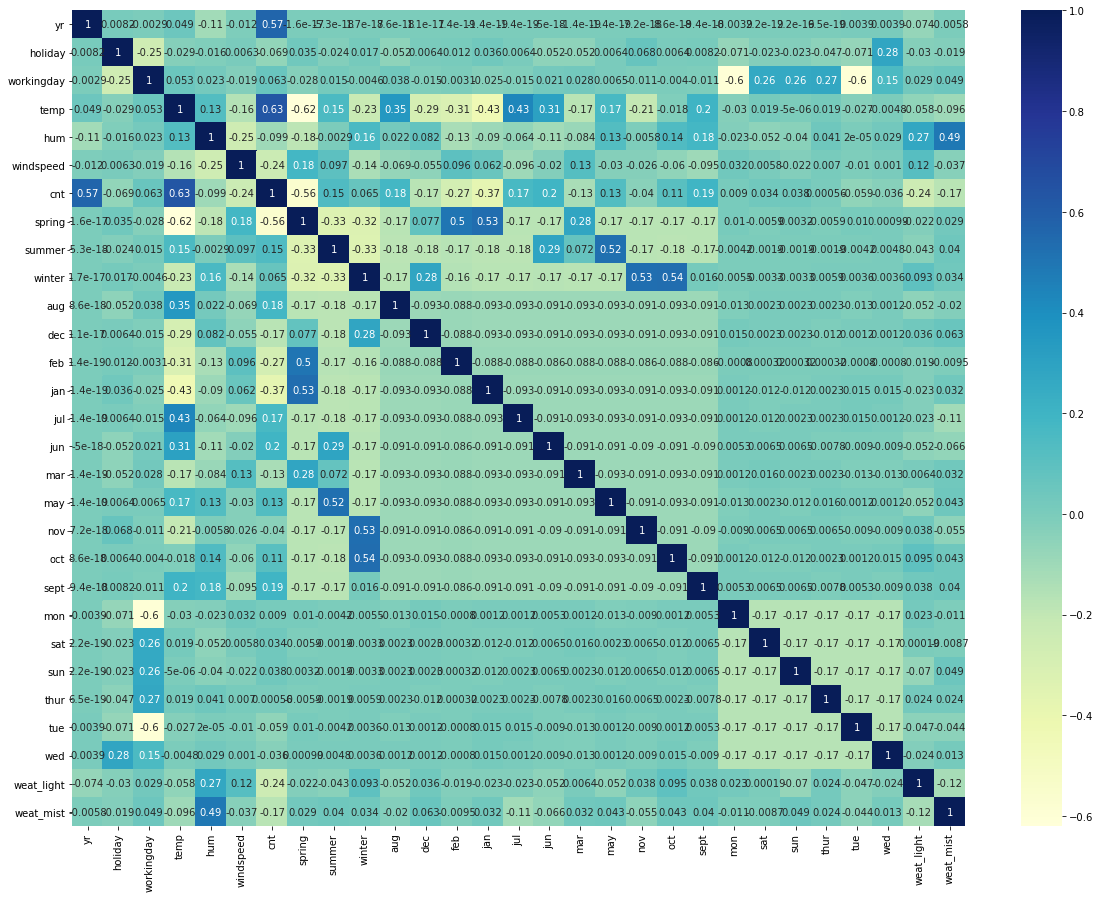

In [28]:
#check the correaltion with new columns with heatmap
plt.figure(figsize=(20,15))
sns.heatmap(bike.corr(), annot =True, cmap="YlGnBu")
plt.show()

### Prepairing Data For Modeling

In [29]:
df_train,df_test = train_test_split(bike,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescalling The Numeric Factors

In [30]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['temp','hum','windspeed','yr','holiday','workingday']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thur,tue,wed,weat_light,weat_mist
576,0.984435,-0.161731,0.691564,1.230870,0.515796,-0.331282,7216,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
426,0.984435,-0.161731,-1.445998,-0.421238,-0.070634,-0.386359,4066,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,0.984435,-0.161731,-1.445998,-1.295618,-1.046051,2.017388,1796,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
482,0.984435,-0.161731,-1.445998,-0.628327,-1.001847,-0.780539,4220,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111,-1.015811,-0.161731,0.691564,-0.849222,0.695551,0.354275,1683,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thur,tue,wed,weat_light,weat_mist
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,-3.091209e-17,-1.570639e-16,-3.748635e-16,-2.746169e-16,-2.166023e-16,9.523972e-18,4485.337255,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1950.666077,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867
min,-1.015811e+00,-1.617311e-01,-1.445998e+00,-2.381884e+00,-4.464419e+00,-1.891589e+00,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.015811e+00,-1.617311e-01,-1.445998e+00,-8.756866e-01,-7.675694e-01,-7.174407e-01,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.844348e-01,-1.617311e-01,6.915641e-01,2.285273e-02,2.219277e-02,-1.421889e-01,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.844348e-01,-1.617311e-01,6.915641e-01,8.765214e-01,7.161828e-01,5.515521e-01,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.844348e-01,6.183104e+00,6.915641e-01,2.050027e+00,2.398847e+00,4.003357e+00,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training The Model

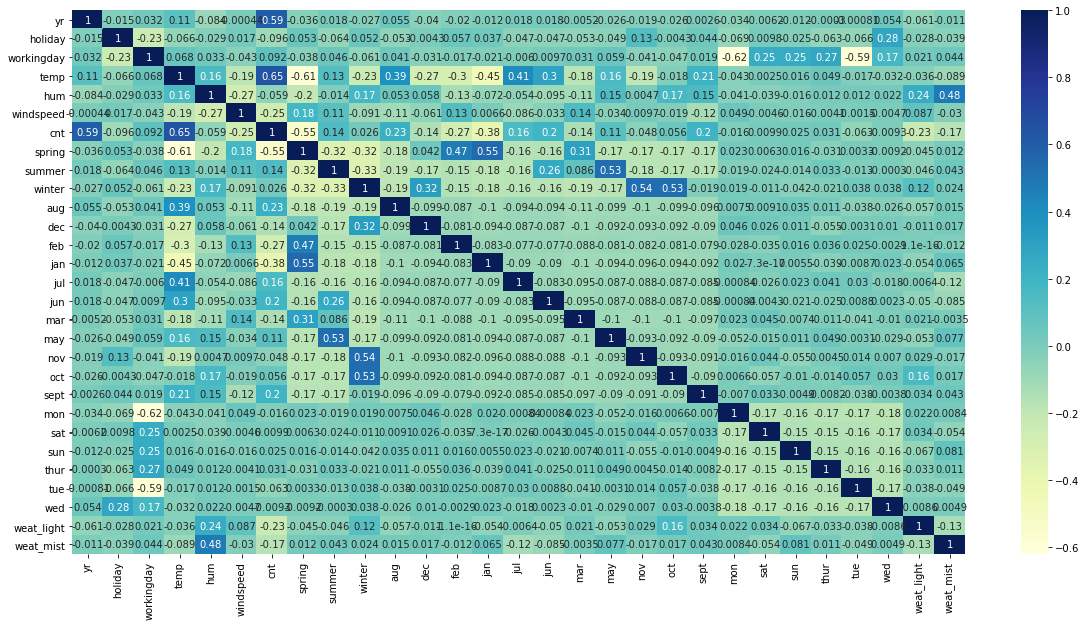

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [33]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed',
       'weat_light', 'weat_mist'],
      dtype='object')

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    float64
 1   holiday     510 non-null    float64
 2   workingday  510 non-null    float64
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   spring      510 non-null    float64
 7   summer      510 non-null    float64
 8   winter      510 non-null    float64
 9   aug         510 non-null    float64
 10  dec         510 non-null    float64
 11  feb         510 non-null    float64
 12  jan         510 non-null    float64
 13  jul         510 non-null    float64
 14  jun         510 non-null    float64
 15  mar         510 non-null    float64
 16  may         510 non-null    float64
 17  nov         510 non-null    float64
 18  oct         510 non-null    float64
 19  sept        510 non-null   

### Adding all the Variables in Model

In [36]:
#build model with all variables
X_train_sm = sm.add_constant(X_train)

#create a model
lr = sm.OLS(y_train,X_train_sm)

#fit the model
lr_model = lr.fit()

#get summary of model
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          3.00e-181
Time:                        22:29:44   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     482   BIC:                             8372.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4407.1486    257.545     17.112      0.000    3901.099    4913.198
yr          1010.0493     35.049     28.819      0.000     941.182    1078.916
holiday        2.7309     39.941      0.068      0.946     -75.749      81.210
workingday   358.3555     49.621      7.222      0.000     260.855     455.856
temp         873.4512     90.721      9.628      0.000     695.193    1051.709
hum         -191.8337     48.823     -3.929      0.000    -287.765     -95.902
windspeed   -274.2693     37.954     -7.226      0.000    -348.846    -199.693
spring      -389.6974    260.487     -1.496      0.135    -901.528     122.133
summer       373.7710    227.201      1.645      0.101     -72.655     820.197
winter       935.5337    242.829      3.853      0.000     458.399    1412.668
aug          177.1104    291.644      0.607      0.544    -395.941     750.162
dec         -384.8529    292.271     -1.317      0.189    -959.135     189.430
feb         -281.9792    286.316     -0.985      0.325    -844.561     280.603
jan         -550.3311    291.912     -1.885      0.060   -1123.908      23.245
jul         -294.2054    303.521     -0.969      0.333    -890.594     302.183
jun           40.0039    215.077      0.186      0.853    -382.600     462.608
mar           11.0761    213.557      0.052      0.959    -408.541     430.694
may          214.4581    182.810      1.173      0.241    -144.744     573.661
nov         -346.6284    316.293     -1.096      0.274    -968.112     274.855
oct           65.5898    311.945      0.210      0.834    -547.351     678.530
sept         746.9719    277.473      2.692      0.007     201.765    1292.179
mon          808.3540     73.034     11.068      0.000     664.849     951.859
sat          -31.5998    127.504     -0.248      0.804    -282.132     218.933
sun           47.7634    129.663      0.368      0.713    -207.011     302.538
thur        -108.0934    128.010     -0.844      0.399    -359.621     143.434
tue          337.0718     70.792      4.761      0.000     197.973     476.171
wed         -134.1688    126.984     -1.057      0.291    -383.679     115.341
weat_light -2223.7163    229.263     -9.699      0.000   -2674.195   -1773.238
weat_mist   -517.6165     90.664     -5.709      0.000    -695.761    -339.472
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     2.24e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

### Get VIF of all Variables

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,158.55
20,mon,108.39
24,tue,98.90
1,holiday,19.45
6,spring,10.75
8,winter,9.44
7,summer,8.27
3,temp,7.08
17,nov,6.79
18,oct,6.47


### RFE- Recursive Feature Elimination

___Take Top 15 Features from `RFE`___

In [38]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 12),
 ('windspeed', False, 4),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('aug', False, 5),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 7),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sept', True, 1),
 ('mon', True, 1),
 ('sat', False, 10),
 ('sun', False, 8),
 ('thur', False, 13),
 ('tue', True, 1),
 ('wed', False, 9),
 ('weat_light', True, 1),
 ('weat_mist', True, 1)]

In [40]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'spring', 'winter', 'dec', 'jan',
       'jul', 'nov', 'sept', 'mon', 'tue', 'weat_light', 'weat_mist'],
      dtype='object')

In [41]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'summer', 'aug', 'feb', 'jun', 'mar', 'may', 'oct',
       'sat', 'sun', 'thur', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [43]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [45]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          5.16e-181
Time:                        22:29:46   Log-Likelihood:                -4132.9
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     495   BIC:                             8359.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4780.8855     71.488     66.877      0.000    4640.429    4921.342
yr          1015.8321     36.344     27.950      0.000     944.424    1087.240
holiday      -10.9456     36.970     -0.296      0.767     -83.583      61.692
workingday   372.6995     33.731     11.049      0.000     306.427     438.972
temp         845.4902     64.202     13.169      0.000     719.348     971.632
spring      -935.1519    138.601     -6.747      0.000   -1207.471    -662.833
winter       642.3426    125.924      5.101      0.000     394.931     889.754
dec         -361.1498    154.829     -2.333      0.020    -665.352     -56.948
jan         -344.8285    160.113     -2.154      0.032    -659.414     -30.243
jul         -521.6249    154.311     -3.380      0.001    -824.809    -218.441
nov         -422.1962    167.898     -2.515      0.012    -752.077     -92.315
sept         526.3476    139.272      3.779      0.000     252.711     799.984
mon          870.0906     67.116     12.964      0.000     738.223    1001.958
tue          382.1686     67.583      5.655      0.000     249.383     514.954
weat_light -2722.1073    218.597    -12.453      0.000   -3151.601   -2292.614
weat_mist   -699.5643     77.562     -9.019      0.000    -851.955    -547.174
==============================================================================
Omnibus:                       85.694   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.720
Skew:                          -0.772   Prob(JB):                     9.93e-60
Kurtosis:                       6.225   Cond. No.                     2.39e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
12,mon,inf
13,tue,inf
4,temp,3.19
5,spring,2.73
6,winter,2.28
10,nov,1.72
8,jan,1.59
7,dec,1.43


___holiday has higher p-value. Lets drop it.___

In [47]:
X_train_new = X_train_rfe.drop(['holiday'],axis=1)

___Rebuild the model without holiday___

In [48]:
X_train_lm = sm.add_constant(X_train_new)

In [49]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [50]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          5.16e-181
Time:                        22:29:48   Log-Likelihood:                -4132.9
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     495   BIC:                             8359.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4760.1873    104.800     45.422      0.000    4554.279    4966.095
yr          1015.8321     36.344     27.950      0.000     944.424    1087.240
workingday   405.1888    109.100      3.714      0.000     190.833     619.545
temp         845.4902     64.202     13.169      0.000     719.348     971.632
spring      -935.1519    138.601     -6.747      0.000   -1207.471    -662.833
winter       642.3426    125.924      5.101      0.000     394.931     889.754
dec         -361.1498    154.829     -2.333      0.020    -665.352     -56.948
jan         -344.8285    160.113     -2.154      0.032    -659.414     -30.243
jul         -521.6249    154.311     -3.380      0.001    -824.809    -218.441
nov         -422.1962    167.898     -2.515      0.012    -752.077     -92.315
sept         526.3476    139.272      3.779      0.000     252.711     799.984
mon          939.5387    246.529      3.811      0.000     455.167    1423.910
tue          451.6166    247.723      1.823      0.069     -35.102     938.335
weat_light -2722.1073    218.597    -12.453      0.000   -3151.601   -2292.614
weat_mist   -699.5643     77.562     -9.019      0.000    -851.955    -547.174
==============================================================================
Omnibus:                       85.694   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.720
Skew:                          -0.772   Prob(JB):                     9.93e-60
Kurtosis:                       6.225   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___Drop the tue with p-value 0.069 > 0.05___

In [51]:
X_train_new = X_train_new.drop(['tue'],axis=1)

___Rebuild the model again without `tue`___

In [52]:
X_train_lm = sm.add_constant(X_train_new)

In [53]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [54]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          1.93e-181
Time:                        22:29:49   Log-Likelihood:                -4134.6
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     496   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4890.4261     76.857     63.630      0.000    4739.420    5041.432
yr          1016.5889     36.427     27.908      0.000     945.019    1088.159
workingday   225.0032     46.305      4.859      0.000     134.025     315.982
temp         843.0168     64.338     13.103      0.000     716.609     969.425
spring      -947.3431    138.764     -6.827      0.000   -1219.980    -674.706
winter       645.7212    126.205      5.116      0.000     397.759     893.683
dec         -368.6904    155.135     -2.377      0.018    -673.494     -63.887
jan         -351.5922    160.445     -2.191      0.029    -666.828     -36.357
jul         -512.5055    154.590     -3.315      0.001    -816.238    -208.773
nov         -458.5285    167.101     -2.744      0.006    -786.842    -130.215
sept         507.6894    139.220      3.647      0.000     234.155     781.224
mon          554.5113    127.467      4.350      0.000     304.069     804.953
weat_light -2716.5319    219.087    -12.399      0.000   -3146.986   -2286.078
weat_mist   -696.1421     77.720     -8.957      0.000    -848.844    -543.441
==============================================================================
Omnibus:                       88.122   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.399
Skew:                          -0.791   Prob(JB):                     4.76e-62
Kurtosis:                       6.284   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#check VIF after dropping holiday, tue
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif 

,Features,VIF
0,const,4.55
1,yr,1.02
2,workingday,1.65
3,temp,3.19
4,spring,2.73
5,winter,2.28
6,dec,1.43
7,jan,1.59
8,jul,1.30
9,nov,1.69


___Drop Jul and check the perfomrance of model___

In [56]:
X_train_new = X_train_new.drop(['jul'],axis=1)

In [57]:
#rebuild the model without jul 
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [58]:
#chekc the summary()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          3.00e-180
Time:                        22:29:50   Log-Likelihood:                -4140.2
No. Observations:                 510   AIC:                             8306.
Df Residuals:                     497   BIC:                             8362.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4852.9174     76.780     63.205      0.000    4702.063    5003.772
yr          1021.3298     36.763     27.782      0.000     949.100    1093.560
workingday   229.7656     46.746      4.915      0.000     137.922     321.609
temp         764.2774     60.391     12.655      0.000     645.623     882.931
spring      -975.2129    139.894     -6.971      0.000   -1250.069    -700.356
winter       661.6813    127.374      5.195      0.000     411.423     911.940
dec         -410.0418    156.180     -2.625      0.009    -716.896    -103.188
jan         -406.9021    161.171     -2.525      0.012    -723.563     -90.242
nov         -490.8529    168.485     -2.913      0.004    -821.883    -159.822
sept         590.0738    138.354      4.265      0.000     318.242     861.906
mon          556.9047    128.740      4.326      0.000     303.963     809.846
weat_light -2737.6933    221.185    -12.377      0.000   -3172.266   -2303.121
weat_mist   -678.9461     78.323     -8.669      0.000    -832.830    -525.062
==============================================================================
Omnibus:                       89.897   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.625
Skew:                          -0.815   Prob(JB):                     7.01e-62
Kurtosis:                       6.255   Cond. No.                         7.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___Drop winter and check the performance of model___

In [59]:
X_train_new = X_train_new.drop(['winter'],axis=1)

In [60]:
#rebuild the model without winter 
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [61]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          9.90e-176
Time:                        22:29:51   Log-Likelihood:                -4153.7
No. Observations:                 510   AIC:                             8331.
Df Residuals:                     498   BIC:                             8382.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5031.1211     70.460     71.404      0.000    4892.685    5169.557
yr          1027.1371     37.692     27.251      0.000     953.081    1101.193
workingday   217.2913     47.887      4.538      0.000     123.207     311.376
temp         654.1987     58.008     11.278      0.000     540.227     768.170
spring     -1296.5545    128.707    -10.074      0.000   -1549.429   -1043.680
dec         -130.4060    150.386     -0.867      0.386    -425.876     165.063
jan         -421.9065    165.296     -2.552      0.011    -746.670     -97.143
nov          -83.5435    152.970     -0.546      0.585    -384.090     217.003
sept         629.3094    141.707      4.441      0.000     350.893     907.726
mon          540.7702    132.018      4.096      0.000     281.390     800.150
weat_light -2614.4746    225.574    -11.590      0.000   -3057.668   -2171.281
weat_mist   -673.9388     80.334     -8.389      0.000    -831.774    -516.104
==============================================================================
Omnibus:                       68.031   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.895
Skew:                          -0.682   Prob(JB):                     7.77e-38
Kurtosis:                       5.486   Cond. No.                         7.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___Drop nov p-value 0.585 > 0.05 and check the perfrmance___

In [62]:
X_train_new = X_train_new.drop(['nov'],axis=1)

In [63]:
#rebuild the model without nov 
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [64]:
#check the summary()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          7.50e-177
Time:                        22:29:52   Log-Likelihood:                -4153.9
No. Observations:                 510   AIC:                             8330.
Df Residuals:                     499   BIC:                             8376.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5012.9722     62.088     80.740      0.000    4890.986    5134.958
yr          1026.7790     37.660     27.264      0.000     952.787    1100.771
workingday   218.6222     47.791      4.575      0.000     124.726     312.518
temp         668.1804     52.017     12.845      0.000     565.981     770.380
spring     -1271.1983    119.957    -10.597      0.000   -1506.881   -1035.516
dec         -108.9041    145.039     -0.751      0.453    -393.867     176.058
jan         -410.5979    163.879     -2.506      0.013    -732.575     -88.621
sept         635.9402    141.086      4.507      0.000     358.744     913.137
mon          544.0478    131.788      4.128      0.000     285.119     802.976
weat_light -2611.1957    225.335    -11.588      0.000   -3053.918   -2168.473
weat_mist   -671.5387     80.157     -8.378      0.000    -829.026    -514.051
==============================================================================
Omnibus:                       67.686   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.259
Skew:                          -0.678   Prob(JB):                     1.07e-37
Kurtosis:                       5.484   Cond. No.                         7.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___Drop dec p-value 0.453 >0.05 and check the performance.___

In [65]:
X_train_new = X_train_new.drop(['dec'],axis=1)

In [66]:
#rebuild the model without dec 
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [67]:
#check the summary()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          6.13e-178
Time:                        22:29:53   Log-Likelihood:                -4154.2
No. Observations:                 510   AIC:                             8328.
Df Residuals:                     500   BIC:                             8371.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4999.6764     59.483     84.051      0.000    4882.808    5116.545
yr          1026.8209     37.644     27.277      0.000     952.862    1100.780
workingday   217.9802     47.762      4.564      0.000     124.140     311.820
temp         681.3181     48.965     13.915      0.000     585.117     777.520
spring     -1264.3004    119.552    -10.575      0.000   -1499.187   -1029.414
jan         -384.9482    160.209     -2.403      0.017    -699.714     -70.183
sept         639.9831    140.922      4.541      0.000     363.111     916.855
mon          540.0348    131.623      4.103      0.000     281.433     798.636
weat_light -2602.9897    224.972    -11.570      0.000   -3044.996   -2160.983
weat_mist   -670.8766     80.117     -8.374      0.000    -828.285    -513.468
==============================================================================
Omnibus:                       66.398   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.354
Skew:                          -0.667   Prob(JB):                     7.53e-37
Kurtosis:                       5.459   Cond. No.                         6.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [69]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,2.00
6,mon,1.74
4,jan,1.63
1,workingday,1.59
2,temp,1.56
8,weat_mist,1.23
5,sept,1.11
7,weat_light,1.03
0,yr,1.02


### Residual analysis of Train Data

In [70]:
y_train_cnst = lm.predict(X_train_lm)

In [71]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

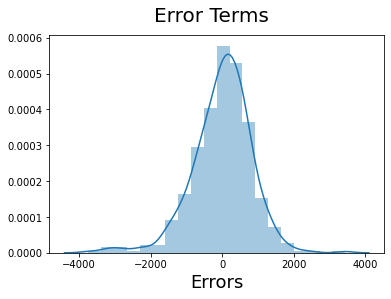

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [73]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.82

### Prediction and Evalution on Test Data

In [74]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thur,tue,wed,weat_light,weat_mist
184,-1.015811,6.183104,-1.445998,1.304506,0.047244,-1.395126,6043,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
535,0.984435,-0.161731,0.691564,1.612837,-0.276917,-0.985373,6211,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,-1.015811,-0.161731,0.691564,-0.112907,1.284930,0.078536,2659,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
221,-1.015811,-0.161731,0.691564,1.525401,-1.464502,0.110155,4780,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,-1.015811,-0.161731,0.691564,1.240076,-2.307309,1.276437,4968,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thur,tue,wed,weat_light,weat_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,-0.052056,0.068990,0.050296,0.094304,-0.084140,-0.044745,4560.559091,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,1.001741,1.190419,0.981788,1.033465,1.020528,0.940739,1904.968544,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,-1.015811,-0.161731,-1.445998,-2.175395,-2.666825,-2.143940,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.015811,-0.161731,-1.445998,-0.806655,-0.832398,-0.719418,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.015811,-0.161731,0.691564,0.091882,-0.170826,-0.122362,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.984435,-0.161731,0.691564,0.968557,0.640461,0.482415,5913.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.984435,6.183104,0.691564,1.980997,2.413579,2.868429,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
#create y_test and X_test
y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
#trained model columns
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'spring', 'jan', 'sept', 'mon',
       'weat_light', 'weat_mist'],
      dtype='object')

In [78]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [79]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [80]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.87e-71
Time:                        22:29:56   Log-Likelihood:                -1788.7
No. Observations:                 220   AIC:                             3597.
Df Residuals:                     210   BIC:                             3631.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5147.9873     93.275     55.191      0.000    4964.111    5331.863
yr          1070.9749     57.586     18.598      0.000     957.454    1184.496
workingday   183.6727     70.671      2.599      0.010      44.357     322.988
temp         583.1075     74.363      7.841      0.000     436.515     729.700
spring     -1725.6855    183.947     -9.381      0.000   -2088.304   -1363.067
jan         -114.3469    248.697     -0.460      0.646    -604.609     375.915
sept         484.9030    207.706      2.335      0.021      75.447     894.359
mon          436.3621    213.590      2.043      0.042      15.307     857.417
weat_light -2256.6903    358.596     -6.293      0.000   -2963.600   -1549.781
weat_mist   -564.7873    124.936     -4.521      0.000    -811.077    -318.497
==============================================================================
Omnibus:                       16.272   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.993
Skew:                          -0.576   Prob(JB):                     7.51e-05
Kurtosis:                       3.863   Cond. No.                         7.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [82]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.8

In [83]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [84]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,2.00
6,mon,1.74
4,jan,1.63
1,workingday,1.59
2,temp,1.56
8,weat_mist,1.23
5,sept,1.11
7,weat_light,1.03
0,yr,1.02


Text(0, 0.5, 'y_pred')

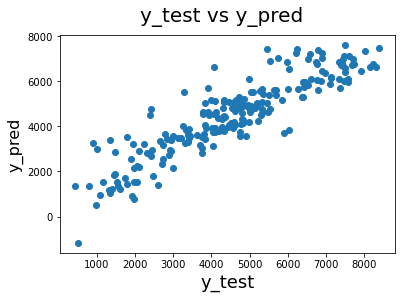

In [85]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [86]:
#final dataframe 
final_df = bike[['yr', 'workingday', 'temp', 'spring', 'jan', 'sept', 'mon','weat_light', 'weat_mist','cnt']]
final_df.head()

,yr,workingday,temp,spring,jan,sept,mon,weat_light,weat_mist,cnt
0,0,0,14.110847,1.0,1.0,0.0,1.0,0.0,1.0,985
1,0,0,14.902598,1.0,1.0,0.0,0.0,0.0,1.0,801
2,0,1,8.050924,1.0,1.0,0.0,0.0,0.0,0.0,1349
3,0,1,8.200000,1.0,1.0,0.0,0.0,0.0,0.0,1562
4,0,1,9.305237,1.0,1.0,0.0,0.0,0.0,0.0,1600


In [87]:
#for numeric variables draw pairplot
# sns.pairplot(final_df)
# plt.show()

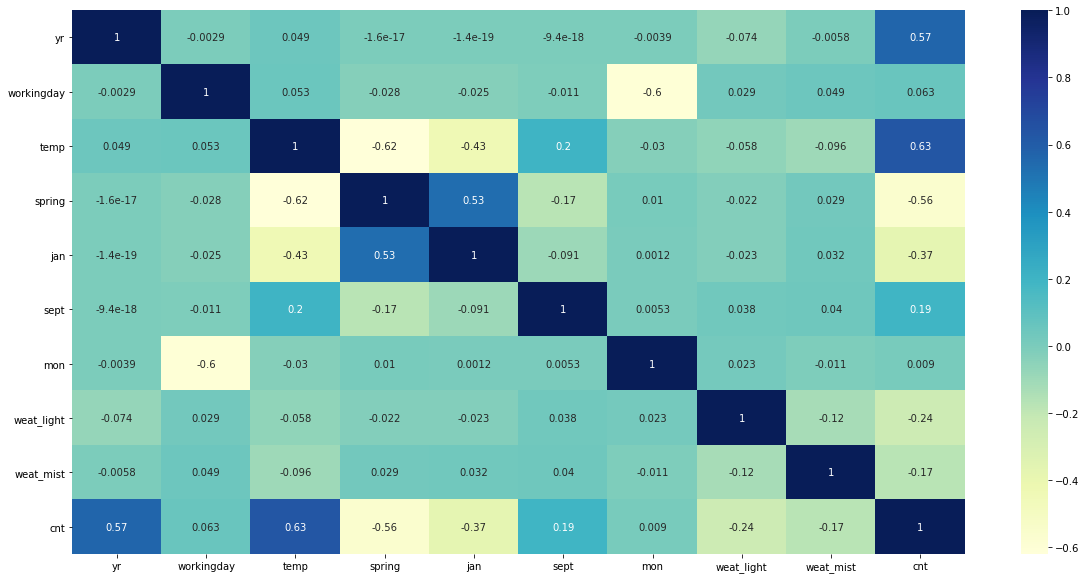

In [88]:
#heatmap to show relationship between variables
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True, cmap="YlGnBu")
plt.show()

### Final evalution
- No of Variables = `9` i.e. `yr`, `workingday`, `temp`, `spring`, `jan`, `sept`, `mon`,`weat_light`, `weat_mist`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.82`
- r2 score for Test Data set model = `0.80`